# Titanic 
<img src="titanic.jpg" alt="Drawing" style="width: 100%;height: 300px"/>


Esta notebook nos guía a través de un flujo de trabajo típico para encarar la ingeniería de features en competencias de ciencia de datos de sitios como Kaggle.

Hay muchas notebooks excelentes en Kaggle para estudiar soluciones a este tipo de trabajos. Sin embargo, muchos omitirán parte de la explicación sobre cómo se desarrolla la solución, ya que estos son desarrollados por expertos para expertos. El objetivo de este noteook es seguir un flujo de trabajo paso a paso, explicando cada paso y la justificación de cada decisión que tomamos durante el desarrollo de la solución.

Las soluciones que aquí propondremos no son ni las únicas ni las mejores, son simplemente una forma de adentrarnos en los conceptos vistos en la clase mediante la práctica. Hay formas mejores de tratar estos datos y espero que después de esta práctica se les ocurran a ustedes!

## Etapas del flujo de trabajo

Algunos libros definen el flujo de trabajo mediante las siguientes etapas:

1. Definición de pregunta o problema.
2. Adquirir datos de entrenamiento y pruebas.
3. Discutir, preparar, limpiar los datos.
4. Analizar, identificar patrones y explorar los datos.
5. Modelar, predecir y resolver el problema.
6. Visualizar, informar y presentar los pasos para la resolución de problemas y la solución final.
7. Proporcione o envíe los resultados.

En esta clase vamos a ver hasta el paso 4 ya que de ahí en adelante comienza el entramiento de los modelos de ML.

Estel flujo de trabajo es simplemente orientativo, en la práctica y según el caso puede variar:

- Podemos combinar múltiples etapas de flujo de trabajo. Podemos analizar visualizando datos.
- Realizar una etapa antes de lo indicado. 
- Realizar una etapa varias veces en nuestro flujo de trabajo. El escenario visualización se puede utilizar varias veces.
- Eliminar un escenario por completo. Es posible que no necesitemos una etapa de suministro para producir o habilitar el servicio para nuestro conjunto de datos para una competencia.
- Etc

## Definición de preguntas y problemas

Los sitios de competencia como Kaggle definen el problema a resolver o las preguntas a formular mientras proporcionan los conjuntos de datos para entrenar su modelo de ciencia de datos y probar los resultados del modelo contra un conjunto de datos de prueba. La pregunta o definición del problema para la competencia Titanic Survival está [descrita aquí en Kaggle](https://www.kaggle.com/c/titanic).

> Inferir a partir de un conjunto de muestras de entrenamiento que enumera a los pasajeros que sobrevivieron o no al desastre del Titanic, nuestro modelo debe determinar en base a un conjunto de datos de prueba dado que no contiene la información de supervivencia, si estos pasajeros en el conjunto de datos de prueba sobrevivieron o no.

También puede que queramos entender mejor de que se trata el problema. Esto se describe en la [página de descripción de la competencia de Kaggle aquí](https://www.kaggle.com/c/titanic). Estos es lo mas importante a tener en cuenta.

- El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg, matando a 1502 de los 2224 pasajeros y tripulación. Tasa de supervivencia traducida del 32%.
- Una de las razones por las que el naufragio provocó tantas pérdidas de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación.
- Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

## Objetivos de la ingeniería de features

La ingeniería de features en términos generales apunta a resolver los siguientes objetivos:

**Correlación** Se puede abordar el problema en función de los features disponibles dentro del set de entrenamiento. ¿Qué features dentro del conjunto de datos contribuyen significativamente a nuestro objetivo de solución? Hablando estadísticamente, ¿existe una [correlación](https://en.wikiversity.org/wiki/Correlation) entre una característica y un objetivo de solución? A medida que cambian los valores de las funciones, ¿cambia también el estado de la solución y viceversa? Esto se puede probar tanto para features numéricos como categóricos. También es posible que deseemos determinar la correlación entre features distintos de la supervivencia para los objetivos posteriores y las etapas del flujo de trabajo. Correlacionar ciertos features puede ayudar a crear, completar o corregir features.

**Conversión** Para la etapa de modelado, es necesario preparar los datos. Dependiendo de la elección del algoritmo del modelo, se puede requerir que todas las características se conviertan a valores numéricos equivalentes. Así, por ejemplo, convertir valores categóricos de texto en valores numéricos.

**Completado** La preparación de datos también puede requerir que estimemos los valores faltantes dentro de una función. Los algoritmos de modelo pueden funcionar mejor cuando no faltan valores.

**Corrección** También podemos analizar el conjunto de datos de entrenamiento dado en busca de errores o valores posiblemente inexactos dentro de los features e intentar corregir estos valores o excluir las muestras que contienen los errores. Una forma de hacer esto es detectar cualquier valor atípico (outliers) entre nuestras muestras o features. También podemos descartar por completo un feature si no contribuye al análisis o puede sesgar significativamente los resultados.

**Creando** ¿Podemos crear nuevos features basados en un feature existente o en un conjunto de features, de modo que el nuevo feature siga los objetivos de correlación, conversión e integridad?



In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Adquirir datos
La librería Pandas nos ayuda a trabajar con nuestros conjuntos de datos. Comenzamos cargando los datos de entrenamiento en Pandas DataFrames.

In [2]:
train_df = pd.read_csv('titanic-train.csv')

## Analizar a través de la descripción

Pandas también ayuda a describir los conjuntos de datos que responden a las siguientes preguntas hechas al principio de nuestro proyecto.

**¿Qué features están disponibles en el set de datos?**

Anotar los nombres de los features para manipularlos o analizarlos directamente. Estos features se describen en la [página de datos de Kaggle aquí](https://www.kaggle.com/c/titanic/data).

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**¿Qué features son string?**

Dentro de los features categóricos, ¿los valores son nominales, ordinales, de razón o de intervalo? Entre otras cosas, esto nos ayuda a seleccionar los gráficos adecuados para la visualización.

- Categórico: Survived, Sex, and Embarked. 
- Ordinal: Pclass.

**¿Qué features son numéricos?**

Dentro de las características numéricas, ¿los valores son discretos, continuos o basados en series temporales? Entre otras cosas, esto nos ayuda a seleccionar los gráficos adecuados para la visualización.

- Continuo: Edad, Tarifa. 
- Discreto: SibSp, Parch.

**¿Qué features son tipos de datos mixtos?**

Datos numéricos y alfanuméricos dentro de la misma función. Estos son candidatos para corregir.

- Ticket es una combinación de tipos de datos numéricos y alfanuméricos. La cabina es alfanumérica.

**¿Qué features pueden contener errores o errores tipográficos?**

Esto es más difícil de revisar para un conjunto de datos grande, sin embargo, revisar algunas muestras de un conjunto de datos más pequeño puede decirnos directamente qué características pueden requerir corrección.

- El nombre puede contener errores o errores tipográficos, ya que hay varias formas de describir un nombre, incluidos títulos, corchetes y comillas que se utilizan para nombres alternativos o abreviados.

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**¿Qué características contienen valores en blanco, nulos o vacíos?**

Estos requerirán corrección.

- Cabin > Age > Embarked contienen una cantidad de valores nulos en ese orden.

**¿Cuáles son los tipos de datos?**

Es importane para la conversión

- Siete features son números enteros o flotantes.
- Cinco features son strings.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**¿Cuál es la distribución de valores de los features numéricas en las muestras?**

Esto nos ayuda a determinar, entre otras ideas iniciales, qué tan representativo es el conjunto de datos de entrenamiento del dominio del problema real.

- Las muestras totales son 891 o el 40% del número real de pasajeros a bordo del Titanic (2224).
- survive es una característica categórica con valores 0 o 1.
- Alrededor del 38% de las muestras sobrevivieron, lo cual es representativo de la tasa de supervivencia real del 32%.
- La mayoría de los pasajeros (> 75%) no viajaron con padres o hijos.
- Casi el 30% de los pasajeros tenían hermanos y / o cónyuge a bordo.
- Las tarifas variaron significativamente y pocos pasajeros (<1%) pagaron hasta $ 512.
- Pocos pasajeros de edad avanzada (<1%) con edades comprendidas entre los 65 y los 80 años.

In [7]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**¿Cuál es la distribución de los features categóricos?**

- Los nombres son únicos en todo el conjunto de datos (recuento = único = 891)
- Variable Sex con dos valores posibles con 65% de hombres (top = hombres, frecuencia = 577 / recuento = 891).
- Los valores de Cabin tienen varios duplicados en las muestras. Puede pensarse entonces que varios pasajeros compartieron una cabina.
- Embarked toma tres valores posibles. Puerto S utilizado por la mayoría de los pasajeros (top = S)
- Ticket tiene una alta proporción (22%) de valores duplicados (únicos = 681).

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [12]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Supuestos basados en el análisis de datos

Llegamos a los siguientes supuestos basados en el análisis de datos realizado hasta ahora.

**Correlación**

Queremos saber qué tan bien se correlaciona cada feature con Survival. Queremos hacer esto al principio de nuestro proyecto y hacer coincidir estas correlaciones rápidas con correlaciones modeladas más adelante en el proyecto.

**Completando**

1. Es posible que deseemos completar Edad, ya que definitivamente está correlacionada con la supervivencia.
2. Es posible que deseemos completar Embarked, ya que también puede correlacionarse con la supervivencia u otro feature importante.

**Corrección**

1. El feature Ticket puede eliminarse de nuestro análisis ya que contiene una alta proporción de duplicados (22%) y es posible que no haya una correlación entre Ticket y supervivencia.
2. Cabin puede descartarse porque está muy incompleta o contiene muchos valores nulos.
3. PassengerId puede eliminarse del conjunto de datos de entrenamiento ya que no contribuye a la supervivencia.
4. Name puede que no contribuya directamente a la supervivencia, por lo que tal vez se elimine.

**Creando**

1. Podríamos probar creando un nuevo feature "Familia" basado en Parch y SibSp para obtener el recuento total de miembros de la familia a bordo.
2. También podríamos crear un feature  en base al Nombre para extraer Título (Mr, Miss,etc) como un nuevo feature.
3. Otro feature puede ser bandas de edad. Esto convierte un feature numérico continuo en un feature categórico ordinal.
4. Por último podemos crear el feature de rango de tarifa y ver si ayuda a nuestro análisis.


## Analizando mediante features pivot

Para confirmar algunas de nuestras observaciones y suposiciones, podemos analizar rápidamente nuestras correlaciones de features haciendo pivotarlos entre sí. Solo podemos hacerlo en esta etapa para los features que no tienen valores vacíos. También tiene sentido hacerlo solo para features que son de tipo categórico (Sex), ordinal (Pclass) o discreto (SibSp, Parch).

- **Pclass** Parece haber una correlación importante entre Pclass = 1 y Survived. Decidimos incluir esta característica en nuestro modelo.
- **Sexo** Sexo = mujer tuvo una tasa de supervivencia muy alta: 74%
- **SibSp y Parch** No se ve una correlación clara, podemos probar entonces derivar algunos nuevos features en base a ellos.

## Analizando mediante visualización de datos

Ahora podemos continuar confirmando (o no) algunas de nuestras suposiciones usando visualizaciones.

### Features numéricos

Comencemos por inferir las correlaciones entre los features numéricos y Survival.

Un histograma es útil para analizar variables numéricas continuas como Edad, donde las bandas o rangos ayudarán a identificar patrones útiles. El histograma puede indicar la distribución de muestras utilizando contenedores definidos automáticamente o bandas de igual rango. Esto nos ayuda a responder preguntas relacionadas con bandas específicas (¿Tuvieron los bebés una mejor tasa de supervivencia?)

Tenga en cuenta que el eje x en las visualizaciones de historgram representa el recuento de muestras o pasajeros.



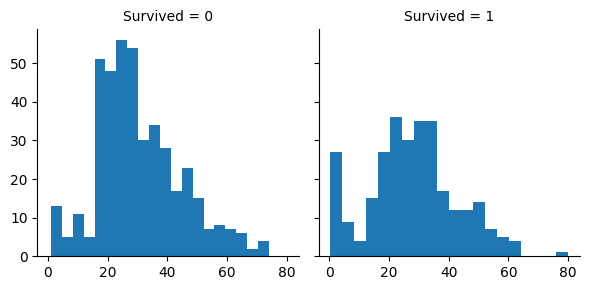

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map_dataframe(lambda data, color: plt.hist(data['Age'], bins=20, color=color))
plt.show()

**Observaciones**

- Los bebés (edad <= 4) tuvieron una alta tasa de supervivencia.
- Sobrevivieron los pasajeros más viejos (Edad = 80).
- Un gran número de jóvenes de 15 a 25 años no sobrevivió.
- La mayoría de los pasajeros tienen entre 15 y 35 años.

**Decisiones**

Este simple análisis confirma nuestras suposiciones como decisiones para las etapas posteriores del flujo de trabajo.

- Debemos considerar la edad en nuestros modelos
- Completar la Edad para valores nulos
- Podría servir agrupar la edad 

### Correlación de features numéricas y ordinales

Podemos combinar múltiples features para identificar correlaciones usando un solo gráfico. Esto se puede hacer con features numéricos y categóricos que tienen valores numéricos.



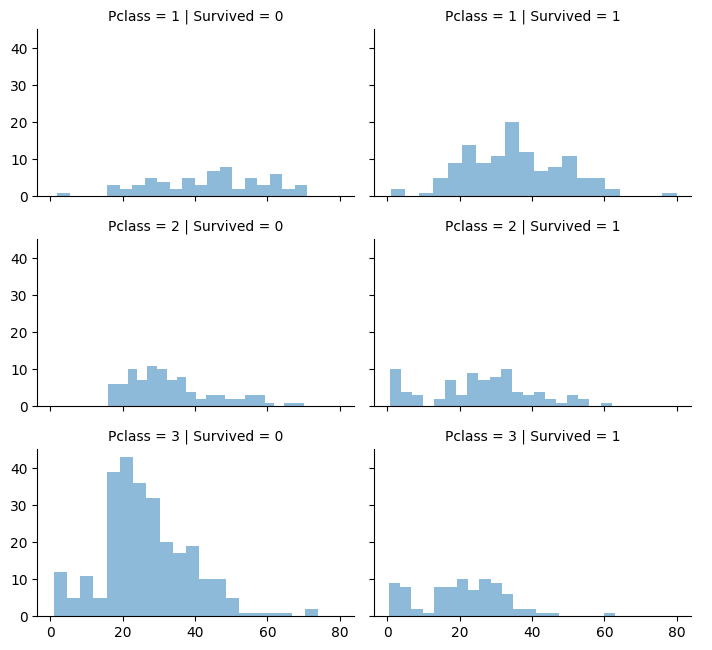

In [15]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map_dataframe(lambda data, color: plt.hist(data['Age'], bins=20, alpha=0.5, color=color))
grid.add_legend()
plt.show()

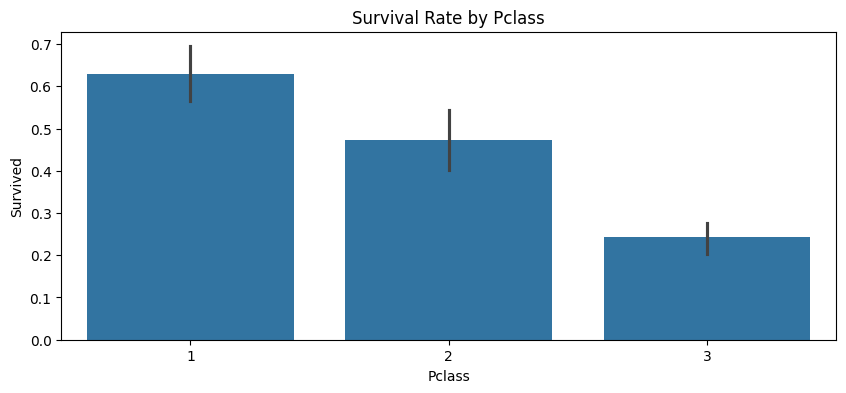

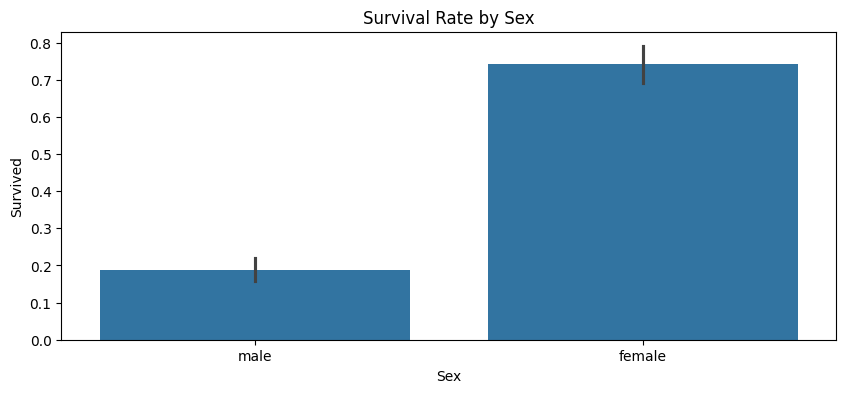

In [16]:
# Plot the survival rate by Pclass
plt.figure(figsize=(10, 4))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()

# Plot the survival rate by Sex
plt.figure(figsize=(10, 4))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

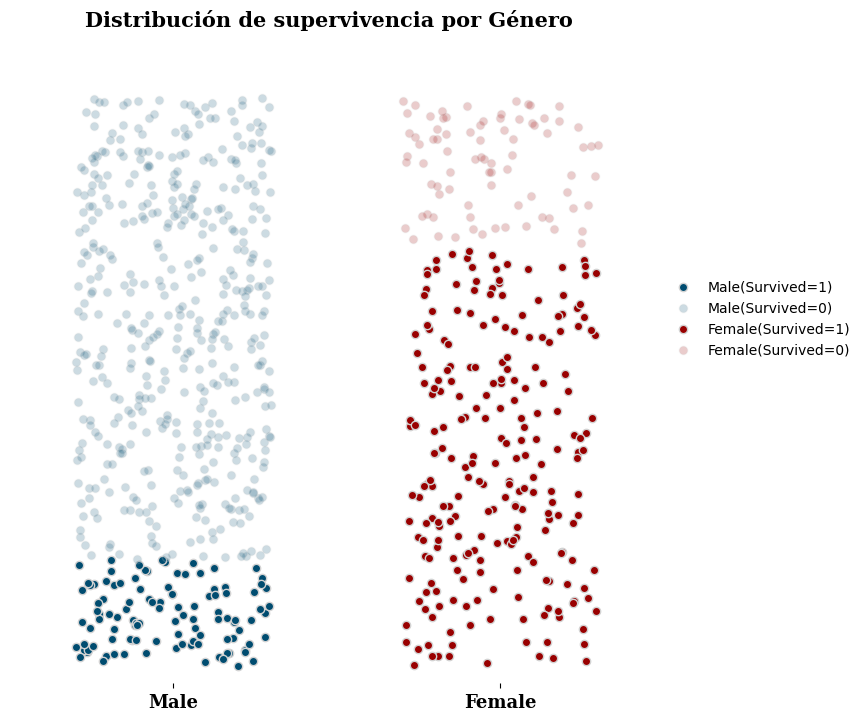

In [17]:
data = train_df
survival_rate = data.groupby(['Sex'])[['Survived']].mean()
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']

male_pos = np.random.uniform(0, male_rate, len(data[(data['Sex']=='male') & (data['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(data[(data['Sex']=='male') & (data['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(data[(data['Sex']=='female') & (data['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(data[(data['Sex']=='female') & (data['Survived']==0)]))
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribución de supervivencia por Género', fontweight='bold', fontfamily='serif', fontsize=15)    
#fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()


**Observaciones**

- Pclass = 3 tenía la mayoría de los pasajeros, sin embargo, la mayoría no sobrevivió. 
- La mayoría de los pasajeros bebés de Pclass = 2 y Pclass = 3 sobrevivieron. 
- La mayoría de los pasajeros de Pclass = 1 sobrevivieron. 
- Pclass varía en términos de distribución por edad de los pasajeros.
- Las mujeres tienen una mayor probabilidad de supervivencia

**Decisiones**

- Pclass resulta un buen feature para hacer inferencias sobre supervivencia

### Correlación de features categóricos


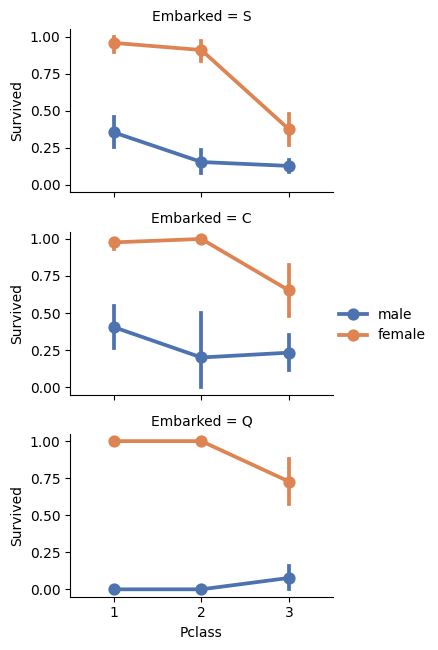

In [18]:
g = sns.FacetGrid(train_df, row="Embarked", height=2.2, aspect=1.6)
g.map_dataframe(sns.pointplot, x='Pclass', y='Survived', hue='Sex', palette='deep', order=[1,2,3], hue_order=['male','female'])
g.add_legend()


**Observaciones**

- Las pasajeras tenían una tasa de supervivencia mucho mejor que los hombres. Confirma lo visto antes.
- Los hombres tuvieron una mejor tasa de supervivencia en Pclass = 3 en comparación con Pclass = 2 para los puertos C y Q. 

**Decisiones**

- Agregamo Sexo al set de features útiles
- Completaremos y agreguaremos también Embarked

### Correlación de features categóricos y numéricos

También es posible que deseemos correlacionar características categóricas (con valores no numéricos) y características numéricas. Podemos considerar correlacionar Embarked (categórico no numérico), Sexo (categórico no numérico), Tarifa (numérico continuo), con Survival (categórico numérico).



/home/juanma/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/juanma/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/juanma/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/juanma/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/juanma/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, 

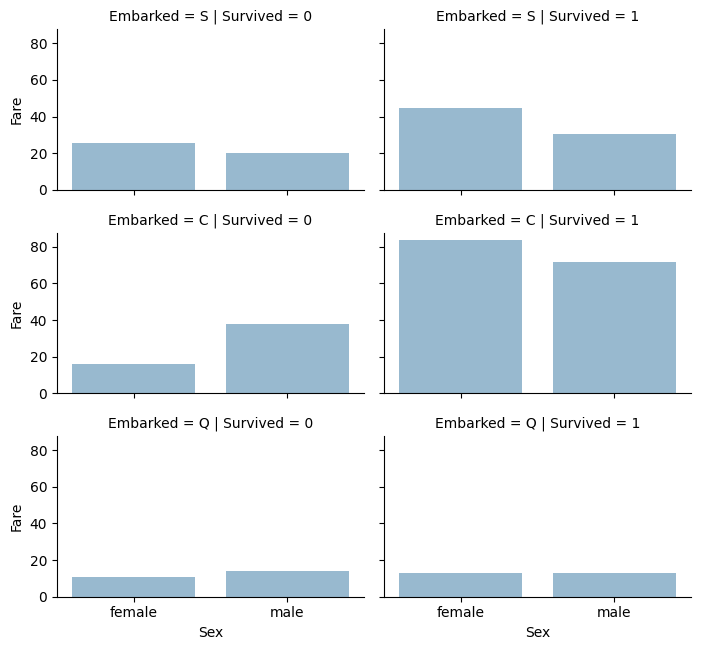

In [19]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map_dataframe(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order = ["female","male"])
grid.add_legend()

**Observaciones**

- Los pasajeros que pagan tarifas más altas tienen una mejor supervivencia. Abona a nuestra suposición de crear rangos de tarifas.
- El puerto de embarque parece correlacionarse con las tasas de supervivencia. Confirma lo ya observado

**Decisiones**

- Agregaremos rangos de tarifas

## Datos conflictivos

Hemos recopilado varias suposiciones y decisiones con respecto a nuestros datos. Hasta ahora no tuvimos que cambiar una solo featureor para llegar a estos. Ejecutemos ahora nuestras decisiones y suposiciones para corregir, crear y completar metas.

### Corrección:eliminando features

Este es un buen objetivo para empezar. Al eliminar features, estamos tratando con menos de datos. Acelera y facilita el análisis.

Basándonos en nuestras suposiciones y decisiones, queremos eliminar los features de Cabin y Ticket.


In [20]:
print("Before", train_df.shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)


"After", train_df.shape

Before (891, 12)


('After', (891, 10))

### Creando nuevos features

Queremos analizar si el Nombre se puede re-diseñar para extraer títulos y probar la correlación entre títulos y supervivencia, antes de eliminar el Nombre y PassengerId.

En el siguiente código, extraemos el feature Título usando expresiones regulares.



In [21]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
train_df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

,Title,Age
0,Capt,70.000000
1,Col,58.000000
2,Countess,33.000000
3,Don,40.000000
4,Dr,42.000000
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,4.574167
9,Miss,21.773973


In [23]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


**Observaciones**

Cuando graficamos Título, Edad y Survival, observamos lo siguiente:

- La mayoría de los títulos clasifican los grupos de edad con precisión. Por ejemplo: el título de maestro tiene una edad media de 5 años.
- Ciertos títulos sobrevivieron en su mayoría (Mme, Lady, Sir) o no (Don, Rev, Jonkheer).

**Decisión.**

- Decidimos conservar el nuevo feature

Podemos reemplazar muchos títulos con un nombre más común o clasificarlos como `Raros` a aquellos con pocas instancias.

In [24]:
   
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
    
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
    
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Conversión 

Podemos convertir los títulos a features categóricos. Dado que a los valores no puede asignarsele un criterio de orden y que tiene una baja cardinalidad los convertimos mediante variables dummie. 

Pregunta: ¿Por que no usamos OneHotEconding?

In [25]:
train_df = pd.concat([train_df,pd.get_dummies(train_df['Title'], prefix='titulo',drop_first=True)],axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rare,False,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss,True,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss,True,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr,False,True,False,False


Ahora podemos eliminar de forma segura el Nombre y el Título. Tampoco necesitamos parece sernos útil PassengerId así que también lo eliminaremos.

In [26]:
train_df = train_df.drop(['Name', 'PassengerId','Title'], axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Rare
0,0,3,male,22.0,1,0,7.2500,S,False,True,False,False
1,1,1,female,38.0,1,0,71.2833,C,False,False,True,False
2,1,3,female,26.0,0,0,7.9250,S,True,False,False,False
3,1,1,female,35.0,1,0,53.1000,S,False,False,True,False
4,0,3,male,35.0,0,0,8.0500,S,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,False,False,False,True
887,1,1,female,19.0,0,0,30.0000,S,True,False,False,False
888,0,3,female,NaN,1,2,23.4500,S,True,False,False,False
889,1,1,male,26.0,0,0,30.0000,C,False,True,False,False


Sigamos con Sex, como en este feature sólo tenemos 2 valores posibles, podemos convertirla usando un sólo campo.

In [27]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Rare
0,0,3,0,22.0,1,0,7.2500,S,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,C,False,False,True,False
2,1,3,1,26.0,0,0,7.9250,S,True,False,False,False
3,1,1,1,35.0,1,0,53.1000,S,False,False,True,False
4,0,3,0,35.0,0,0,8.0500,S,False,True,False,False


### Completando featuros continuos

Ahora deberíamos comenzar a estimar y completar features con valores faltantes o nulos. Primero haremos esto para la Edad.

Podemos considerar tres métodos para esto:

1. Una forma sencilla es generar números aleatorios entre la media y la [desviación estándar](https://en.wikipedia.org/wiki/Standard_deviation).

2. Una forma más precisa de inferir los valores perdidos es utilizar otras features correlacionados. En nuestro caso, notamos correlación entre Edad, Sexo y Clase. Inferir los valores de Edad utilizando los valores de [mediana](https://en.wikipedia.org/wiki/Median) para la Edad en los conjuntos de combinaciones de features Pclass y Gender. Osea, la edad media para Pclass = 1 y Gender = 0, Pclass = 1 y Gender = 1, y así sucesivamente ...

3. Combinar los métodos 1 y 2. Entonces, en lugar de inferir los valores de edad basados en la mediana, usar números aleatorios entre la media y la desviación estándar, basados en conjuntos de combinaciones de Pclass y Gender.

Los métodos 1 y 3 introducirán ruido aleatorio en nuestros modelos. Los resultados de varias ejecuciones pueden variar. Entonces para esta notebook usaremos el método 2.

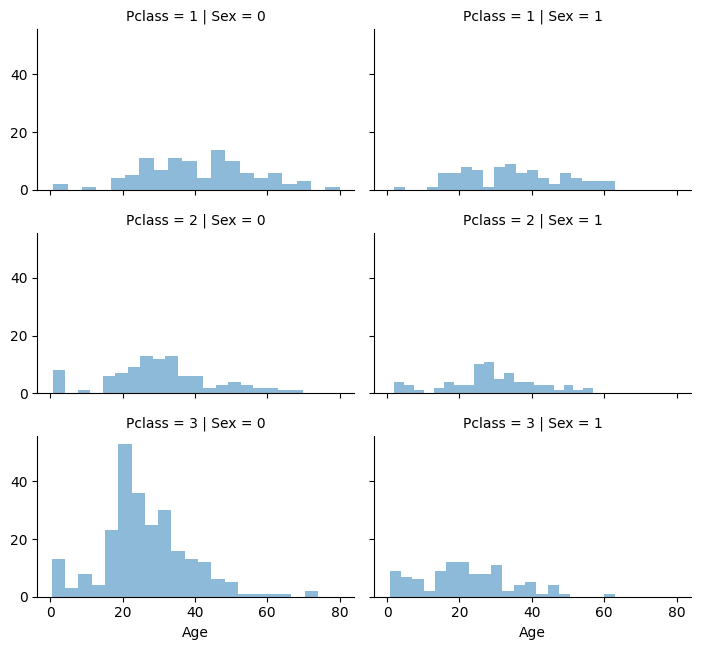

In [28]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map_dataframe(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Comencemos por preparar una matriz vacía para contener valores de edad inferidos basandonos en combinaciones de Pclass x género.

In [29]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Ahora iteramos sobre Sexo (0 o 1) y Pclass (1, 2, 3) para calcular los valores inferidos de Edad para las seis combinaciones.

In [30]:

for i in range(0, 2):
    for j in range(0, 3):
        guess_df = train_df[(train_df['Sex'] == i) & \
                                  (train_df['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
for i in range(0, 2):
    for j in range(0, 3):
        train_df.loc[ (train_df.Age.isnull()) & (train_df.Sex == i) & (train_df.Pclass == j+1),\
                  'Age'] = guess_ages[i,j]

train_df['Age'] = train_df['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Rare
0,0,3,0,22,1,0,7.2500,S,False,True,False,False
1,1,1,1,38,1,0,71.2833,C,False,False,True,False
2,1,3,1,26,0,0,7.9250,S,True,False,False,False
3,1,1,1,35,1,0,53.1000,S,False,False,True,False
4,0,3,0,35,0,0,8.0500,S,False,True,False,False


Creemos bandas de edad y determinemos las correlaciones con Survivial.

In [31]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Convirtamoslo ahora en una variable ordinal

In [32]:
 
train_df.loc[ train_df['Age'] <= 16, 'Age_Band'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age_Band'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age_Band'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age_Band'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age_Band']=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Rare,AgeBand,Age_Band
0,0,3,0,22,1,0,7.2500,S,False,True,False,False,"(16.0, 32.0]",1.0
1,1,1,1,38,1,0,71.2833,C,False,False,True,False,"(32.0, 48.0]",2.0
2,1,3,1,26,0,0,7.9250,S,True,False,False,False,"(16.0, 32.0]",1.0
3,1,1,1,35,1,0,53.1000,S,False,False,True,False,"(32.0, 48.0]",2.0
4,0,3,0,35,0,0,8.0500,S,False,True,False,False,"(32.0, 48.0]",2.0


Ahora podemos eliminar AgeBand.

In [33]:
train_df = train_df.drop(['AgeBand'], axis=1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Rare,Age_Band
0,0,3,0,22,1,0,7.2500,S,False,True,False,False,1.0
1,1,1,1,38,1,0,71.2833,C,False,False,True,False,2.0
2,1,3,1,26,0,0,7.9250,S,True,False,False,False,1.0
3,1,1,1,35,1,0,53.1000,S,False,False,True,False,2.0
4,0,3,0,35,0,0,8.0500,S,False,True,False,False,2.0


### Creando nuevos features combinando los existentes

Podemos crear un nuevo feature "FamilySize" que combine Parch y SibSp. Esto podría darnos mas semántica.

In [34]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Embarked toma valores S, Q, C según el puerto de embarque. Nuestro conjunto de datos de entrenamiento tiene dos valores perdidos. Como tenemos sólo dos missings simplemente los llenamos con la ocurrencia más común.

In [35]:
train_df[train_df.Embarked.isnull()].shape[0]

2

In [36]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [37]:
train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Conversión categóricos en numéricos

Ahora podemos convertir Embarked, al igual que con el título no podemos tener una noción de orden, por lo que recurriremos nuevamente a variables dummy.

In [38]:
train_df = pd.concat([train_df,pd.get_dummies(train_df['Embarked'], prefix='embarked',drop_first=True)],axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Rare,Age_Band,FamilySize,embarked_Q,embarked_S
0,0,3,0,22,1,0,7.2500,S,False,True,False,False,1.0,2,False,True
1,1,1,1,38,1,0,71.2833,C,False,False,True,False,2.0,2,False,False
2,1,3,1,26,0,0,7.9250,S,True,False,False,False,1.0,1,False,True
3,1,1,1,35,1,0,53.1000,S,False,False,True,False,2.0,2,False,True
4,0,3,0,35,0,0,8.0500,S,False,True,False,False,2.0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,S,False,False,False,True,1.0,1,False,True
887,1,1,1,19,0,0,30.0000,S,True,False,False,False,1.0,1,False,True
888,0,3,1,21,1,2,23.4500,S,True,False,False,False,1.0,4,False,True
889,1,1,0,26,0,0,30.0000,C,False,True,False,False,1.0,1,False,False


Creemos ahra un rango de tarifa "FareBand".

In [39]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convertimos Tarifa a valores ordinales

In [40]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare_Band'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare_Band'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare_Band']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare_Band'] = 3
train_df['Fare_Band'] = train_df['Fare_Band'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
train_df = train_df.drop(['Embarked'], axis=1)
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Rare,Age_Band,FamilySize,embarked_Q,embarked_S,Fare_Band
0,0,3,0,22,1,0,7.2500,False,True,False,False,1.0,2,False,True,0
1,1,1,1,38,1,0,71.2833,False,False,True,False,2.0,2,False,False,3
2,1,3,1,26,0,0,7.9250,True,False,False,False,1.0,1,False,True,1
3,1,1,1,35,1,0,53.1000,False,False,True,False,2.0,2,False,True,3
4,0,3,0,35,0,0,8.0500,False,True,False,False,2.0,1,False,True,1
5,0,3,0,25,0,0,8.4583,False,True,False,False,1.0,1,True,False,1
6,0,1,0,54,0,0,51.8625,False,True,False,False,3.0,1,False,True,3
7,0,3,0,2,3,1,21.0750,False,False,False,False,0.0,5,False,True,2
8,1,3,1,27,0,2,11.1333,False,False,True,False,1.0,3,False,True,1
9,1,2,1,14,1,0,30.0708,False,False,True,False,0.0,2,False,False,2


## Visualizando con t-SNE

Ahora que ya convertimos nuestras variables e imputamos los datos faltanes, veamos si las reduciendo la dimensionalidad podemos notar algún patrón en nuestros datos.

La idea será ver si aquellos pasajeros que sobrevivieron tienden a estar en clusters o zonas distintas que los que no.

Recordemos que t-SNE es sensible a las escalas de las variables, por lo que primero es recomendable escalarlas.

In [41]:

# Scaler for scaling the data
class Scaler:
    def __init__(self):
        self.scaler = StandardScaler()
    def fit(self,X):
        self.scaler.fit(X.to_numpy())
        return self
    def transform(self,X):
        npArr = self.scaler.transform(X.to_numpy())
        return pd.DataFrame(npArr, columns=X.columns)
scaler = Scaler()

In [42]:
train = train_df
#drop = ["Embarked"]

#scale the dataset
scaler.fit(train)
train = scaler.transform(train)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Rare,Age_Band,FamilySize,embarked_Q,embarked_S,Fare_Band
0,-0.789272,0.827377,-0.737695,-0.531048,0.432793,-0.473674,-0.502445,-0.511898,0.850532,-0.405840,-0.162781,-0.392999,0.059160,-0.307562,0.615838,-1.346777
1,1.266990,-1.566107,1.355574,0.670256,0.432793,-0.473674,0.786845,-0.511898,-1.175735,2.464027,-0.162781,0.827078,0.059160,-0.307562,-1.623803,1.337738
2,1.266990,0.827377,1.355574,-0.230722,-0.474545,-0.473674,-0.488854,1.953514,-1.175735,-0.405840,-0.162781,-0.392999,-0.560975,-0.307562,0.615838,-0.451938
3,1.266990,-1.566107,1.355574,0.445012,0.432793,-0.473674,0.420730,-0.511898,-1.175735,2.464027,-0.162781,0.827078,0.059160,-0.307562,0.615838,1.337738
4,-0.789272,0.827377,-0.737695,0.445012,-0.474545,-0.473674,-0.486337,-0.511898,0.850532,-0.405840,-0.162781,0.827078,-0.560975,-0.307562,0.615838,-0.451938


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f933590af70>
Traceback (most recent call last):
  File "/home/juanma/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/juanma/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/juanma/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/juanma/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


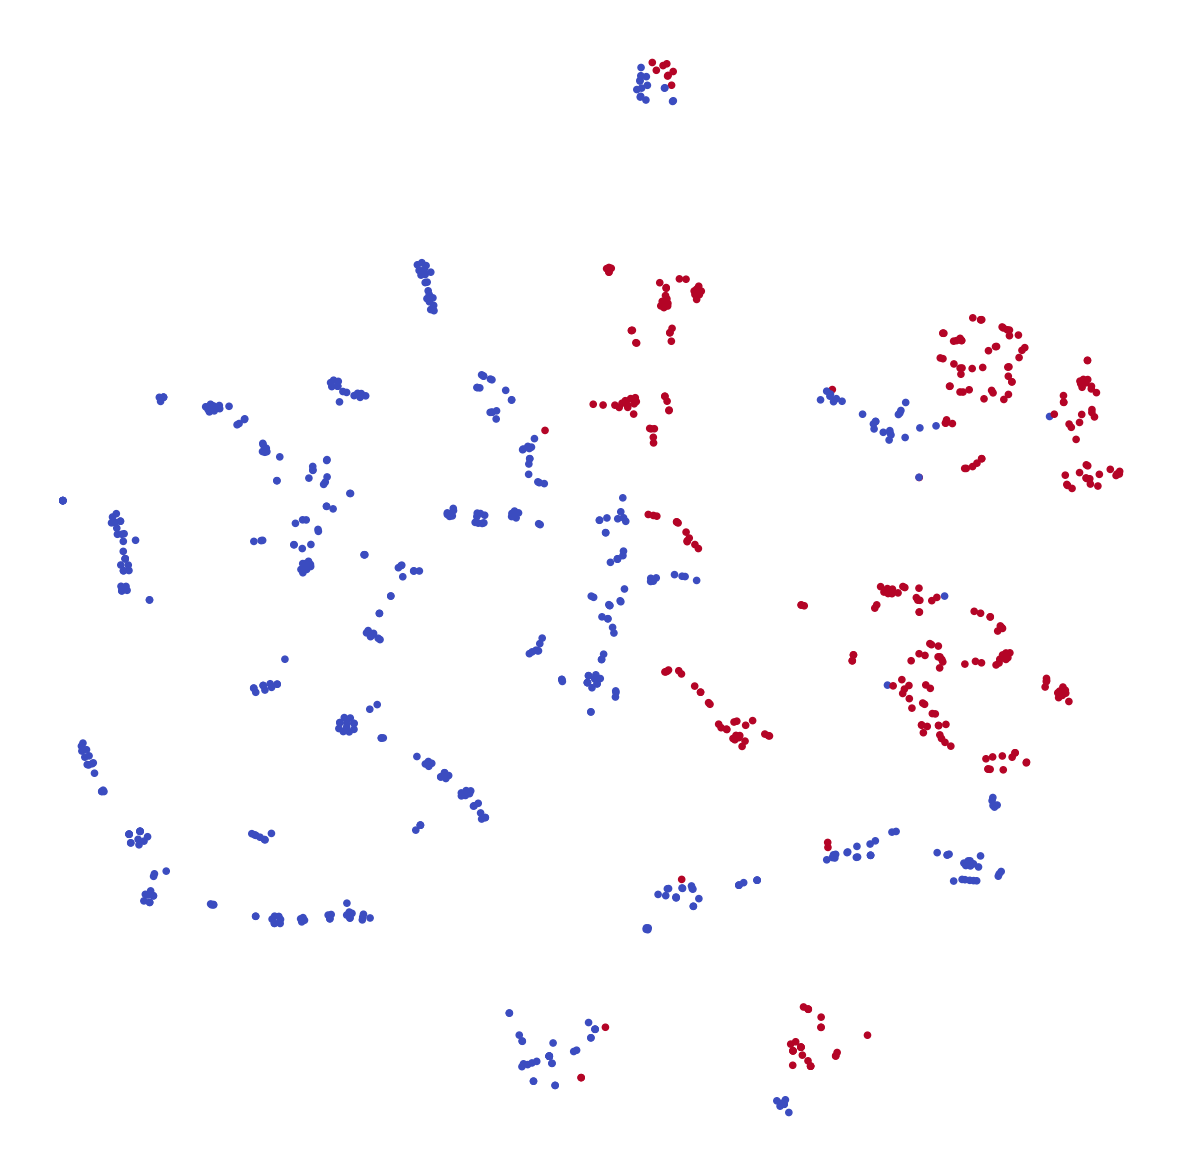

In [55]:

tsne = TSNE(n_components=2, perplexity=10,random_state=20)
projection_2D = tsne.fit_transform(train)

plt.figure(figsize=(15, 15))
plt.scatter(projection_2D[:,0], projection_2D[:,1],
            c=train_df['Survived'], 
            cmap='coolwarm',
            s=20)
plt.axis('off')
plt.show();

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f933a0d94c0>
Traceback (most recent call last):
  File "/home/juanma/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/juanma/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/juanma/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/juanma/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


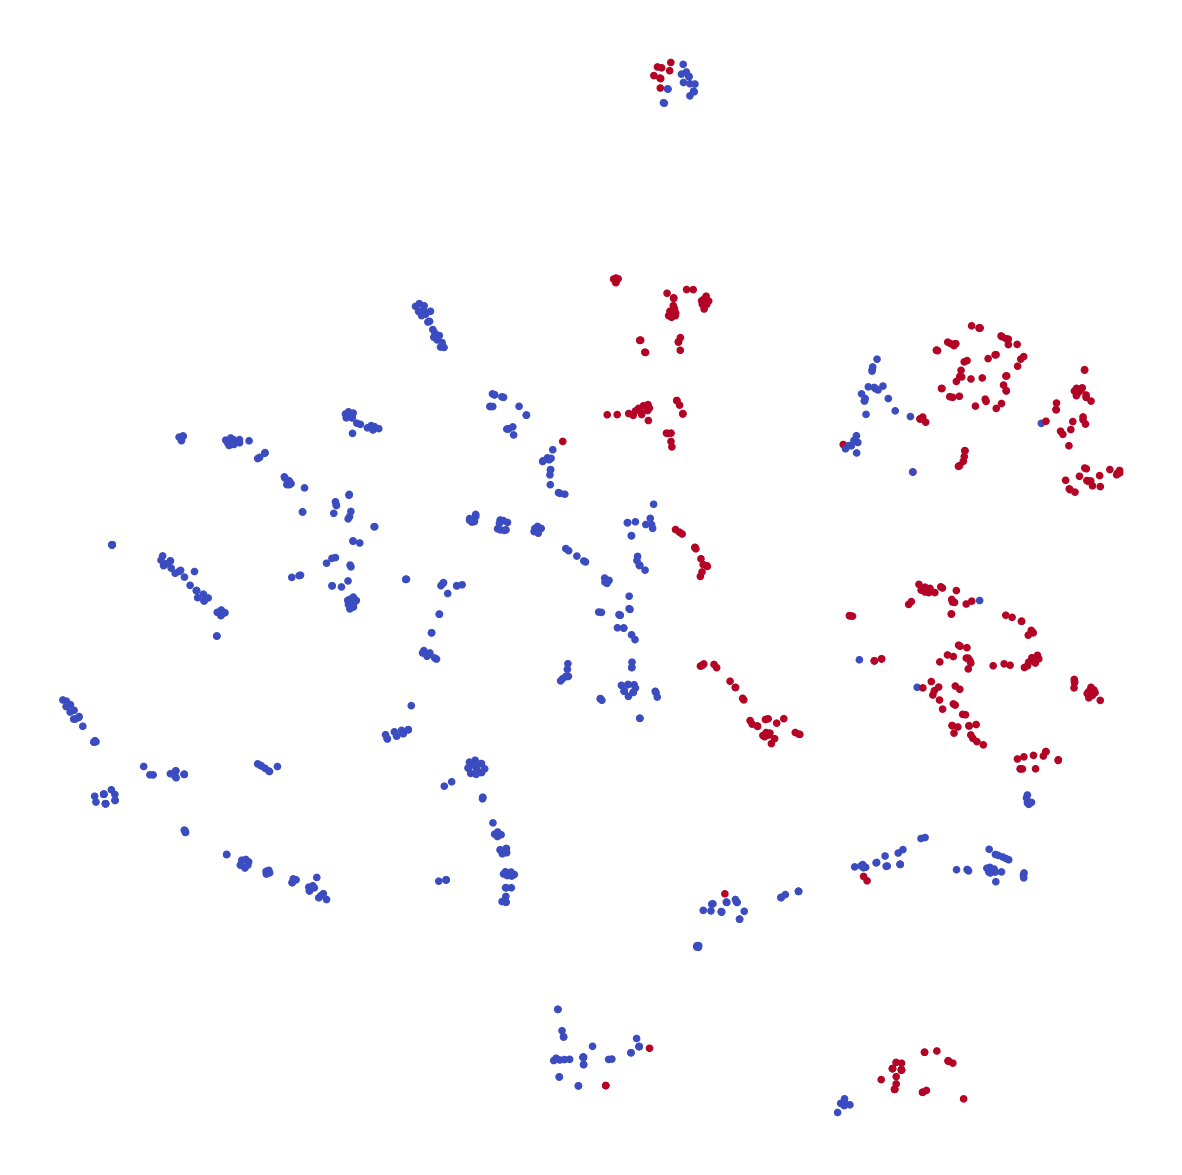

In [54]:

tsne = TSNE(n_components=2, perplexity=10,random_state=10)
projection_2D = tsne.fit_transform(train)

plt.figure(figsize=(15, 15))
plt.scatter(projection_2D[:,0], projection_2D[:,1],
            c=train_df['Survived'], 
            cmap='coolwarm',
            s=20)
plt.axis('off')
plt.show();

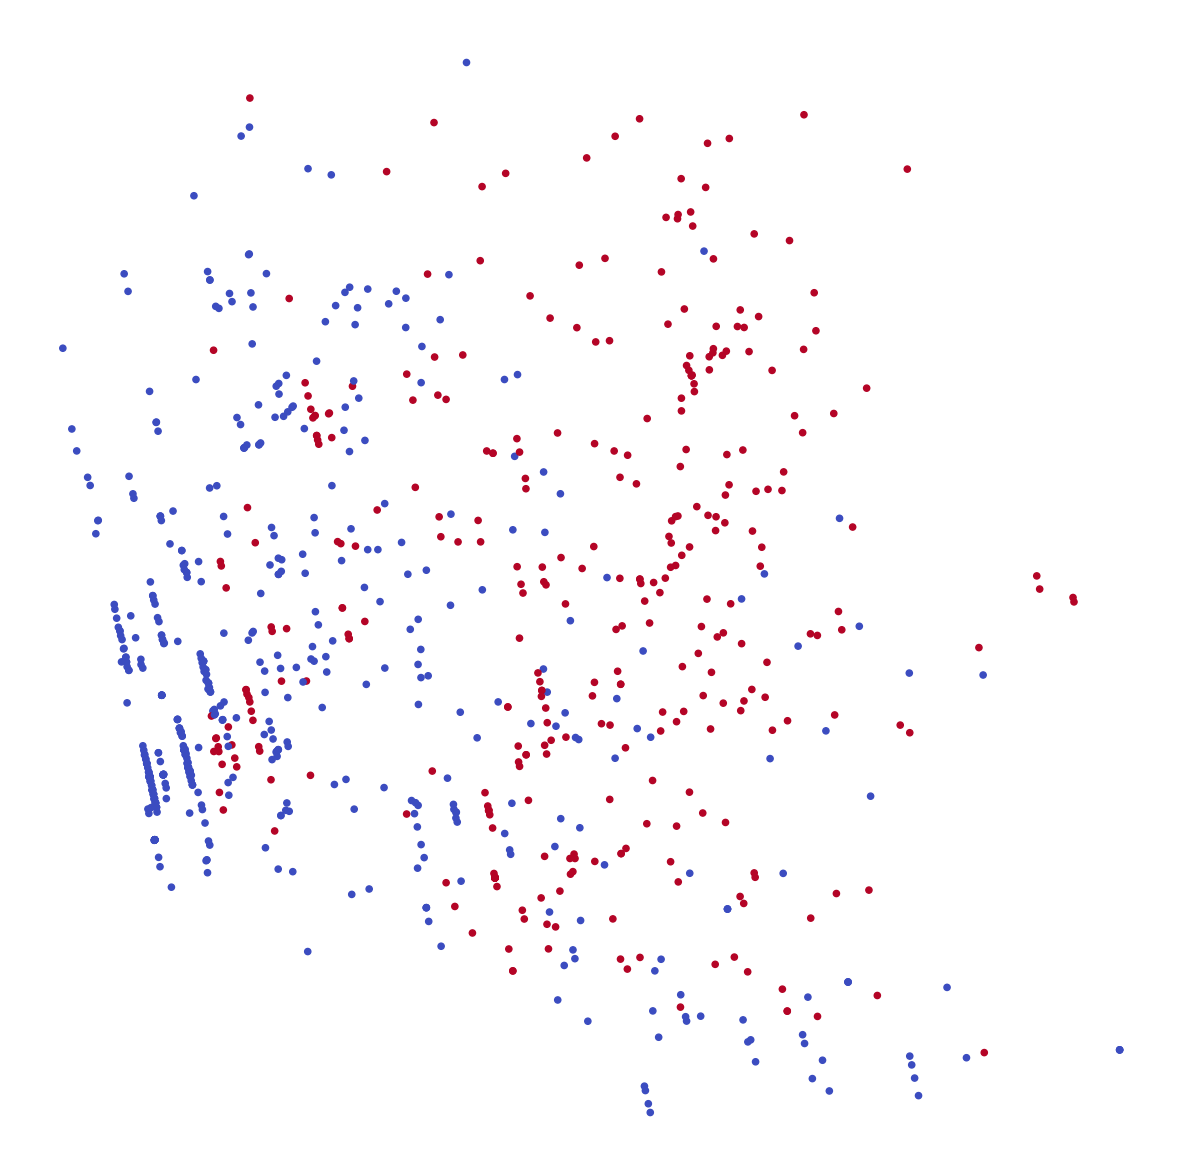

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
#tsne = TSNE(n_components=2, perplexity=10,random_state=10)
projection_2D = pca.fit_transform(train)

plt.figure(figsize=(15, 15))
plt.scatter(projection_2D[:,0], projection_2D[:,1],
            c=train_df['Survived'], 
            cmap='coolwarm',
            s=20)
plt.axis('off')
plt.show();

In [50]:
pca.explained_variance_ratio_

array([2.49973176e-01, 1.82087971e-01, 1.42818596e-01, 8.86081689e-02,
       7.88914275e-02, 6.68532609e-02, 5.45069933e-02, 3.56187132e-02,
       3.02726765e-02, 2.57490487e-02, 2.38212525e-02, 1.21578645e-02,
       5.16412591e-03, 3.13687360e-03, 3.39851428e-04, 6.44201751e-33])

El numero minimo de componentes para explicar el 95% de la varianza es: 9


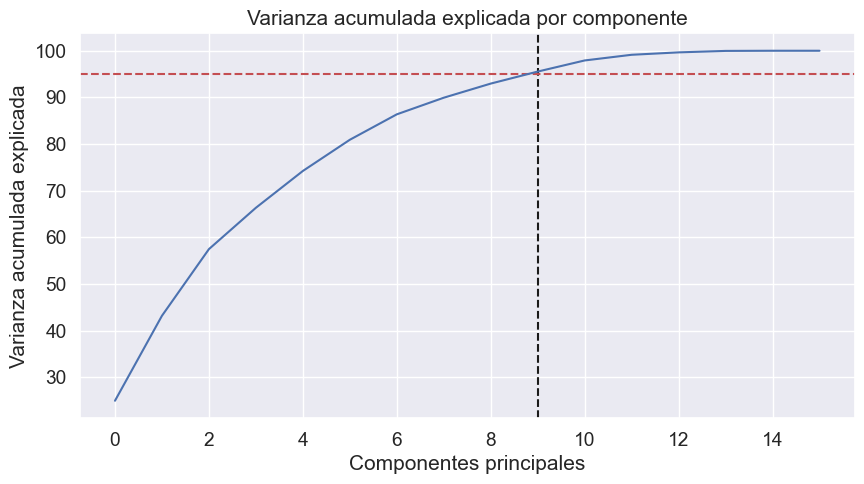

In [51]:
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu > 95)
print(
    "El numero minimo de componentes para explicar el 95% de la varianza es: " + str(k)
)
# print("\n")

plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

## Analizando el nuevo dataset

Veamos ahora un poco que tan útiles son todos los cambios que hicimos. 

Una forma para intentar estimarlo es ver las correlaciones (de pearson) entre todos los pares de features, especialmente con Survival. Una buena forma para visualizar esto es mediante un [heatmap](https://es.wikipedia.org/wiki/Mapa_de_calor).

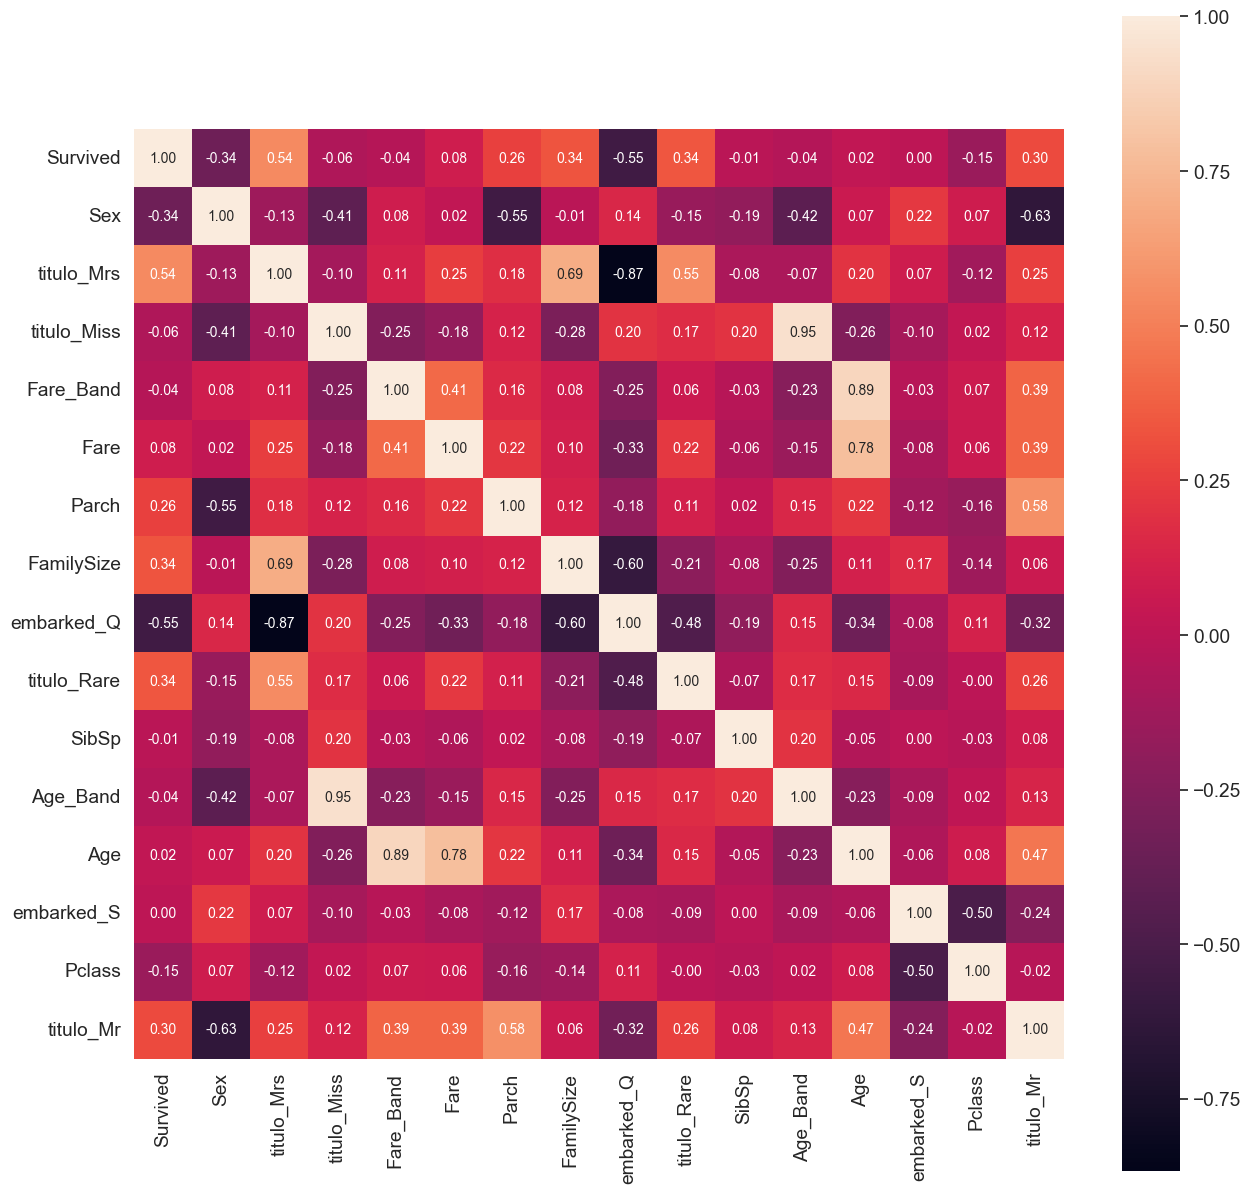

In [44]:

# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr, dtype=bool))
k = 18
cols = corr.nlargest(k, 'Survived')['Survived'].index
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15,15))  
hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

Podemos ver que los 5 features que mas correlacionan positivamente con Survived son: Sex, titulo_Mrs, titulo_Miss, Fare_Band y Fare, mientras que los 5 que mas correlacionan negativamente son: titulo_Mr, Pclass, embarked_S, Age y Age_Band. Osea, de los 10 features que, a priori, podrían resultar más útiles 6 (titulo_Mrs, titulo_Miss, Fare_Band, titulo_Mr, embarked_S y Age_Band) fueron obtenidos mediante la ingeniería de features.

Otra forma para estimar la calidad de nuestro nuevo dataset es mediante el entrenamiento y análisis de modelos simples, por ejemplo: [árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n). Este tipo de modelos los podemos entender como una sucesión de IFS anidados. Los mismos son calculados durante el entrenamiento del modelo de forma tal que cada if pregunta por un feature en particular y en el último está la predicción (en este caso) sobre si un pasajero sobrevivió o no. 

Para verlo mas claramente, entrenemos un árbol de decisión y dibujemoslo:

In [45]:
# !pip install pydotplus
# También instalar Graphviz. (en ubuntu: sudo apt-get install graphviz)

from six import StringIO 
from IPython.display import Image, display
import pydotplus
import sklearn 

def dibujar_arbol(modelo,target_names,feature_names):
    dot_data = StringIO()
    sklearn.tree.export_graphviz(modelo, out_file=dot_data,  
                    filled=True, 
                    class_names = target_names,
                    feature_names=feature_names,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

In [46]:
train_df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'titulo_Miss', 'titulo_Mr', 'titulo_Mrs', 'titulo_Rare', 'Age_Band',
       'FamilySize', 'embarked_Q', 'embarked_S', 'Fare_Band'],
      dtype='object')

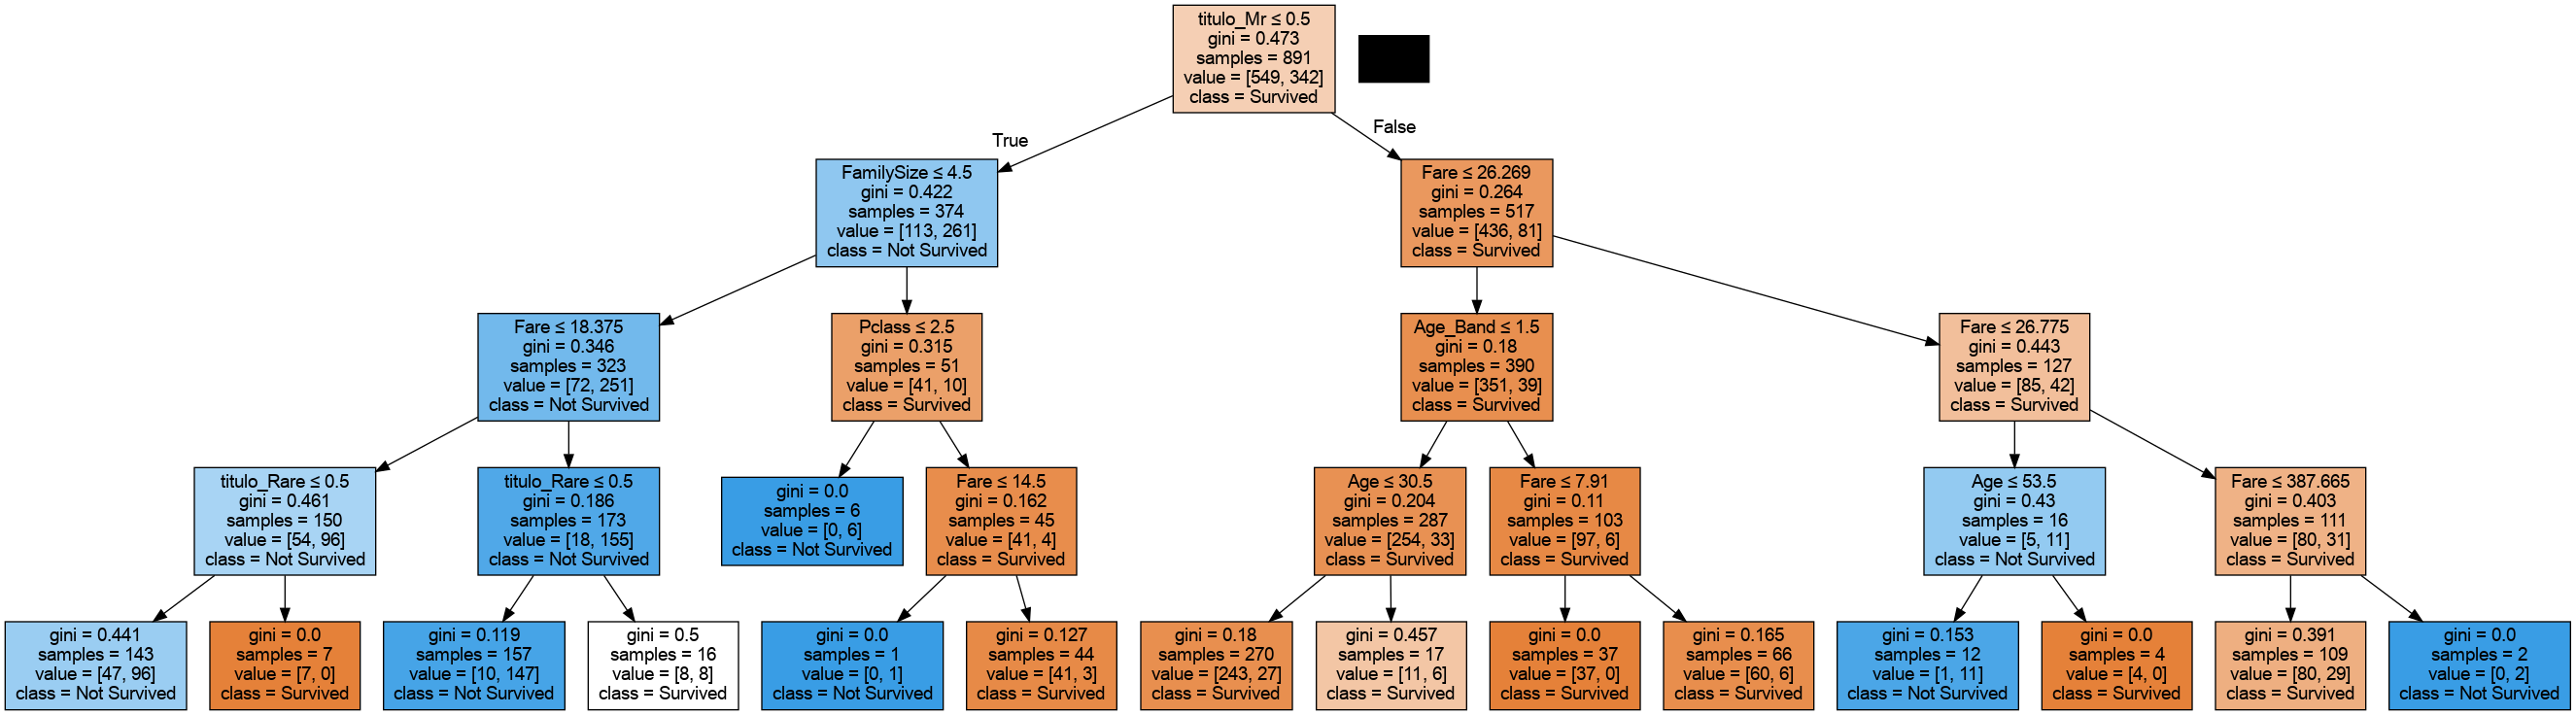

In [47]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=4)
dt.fit(train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'titulo_Miss', 'titulo_Mr', 'titulo_Mrs', 'titulo_Rare',
       'Age_Band', 'FamilySize', 'embarked_Q', 'embarked_S', 'Fare_Band']],train_df['Survived'])

dibujar_arbol(dt,['Survived','Not Survived'],['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'titulo_Miss', 'titulo_Mr', 'titulo_Mrs', 'titulo_Rare',
       'Age_Band', 'FamilySize', 'embarked_Q', 'embarked_S', 'Fare_Band'])

Podemos ver que el primer feature por el que pregunta el modelo es por "titulo_mrs", luego por FamilySize (rama izquierda) y Fare (rama derecha). En el siguiente nivel se utilizan Fare, Pclass y Age y en el siguiente: titulo_Rare, Fare, Fare_Band y Age. 

Si bien desde este punto de vista, parecen ser otros los features mas importantes (esto va variar en cada modelo y configuración del mismo) seguimos teniendo muchos de los features calculados por nosotros en la lista.

Por último podemos estimar que tan bueno es el modelo, hasta ahora vimos que tan útiles podrían resultar los features para nuestro objetivo, ahora veamos efectivamente como resultó la performance de nuestro modelo en base a ellos:

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(dt.predict(train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'titulo_Miss', 'titulo_Mr', 'titulo_Mrs', 'titulo_Rare',
       'Age_Band', 'FamilySize', 'embarked_Q', 'embarked_S', 'Fare_Band']]),train_df['Survived'])

0.8462401795735129

Si bien el accuracy (cantidad de aciertos sobre el total) no es la mejor forma de evaluar la performance nos sirve para tener una idea de como puede performar un modelo simple utilizando nuestros datos.

El accuracy obtenido es del 84%, teniendo en cuenta que el porcentaje que sobrevivió es de un poco mas del 60% un 84% es una muy buena performance!

Como dijimos al principio esta no es la única ni la mejor solución. Si lo vemos desde el punto de vista de la predicción, seguramente otros modelos mas sofisticados y complejos funcionarán mejor y desde el punto de vista de la ingeniería de features seguro podemos hacer mejores preprocesados. 

Ahora les toca a ustedes pensar más y mejores soluciones!
